In [209]:
import pandas as pd
import numpy as np
#These two imports are throwing an error for some reason
import seaborn as sns 
import matplotlib.pyplot as plt

In [210]:
#Import the consolidated data set
file_path = "data\\3_intermediate\\int_texas_border_report.csv"

border_report = pd.read_csv(
    file_path, 
    parse_dates=['nibrs_start_date', 'report_year'], 
    date_format='%Y-%m-%d')

border_report.head()

,agency_name,county,population,nibrs_start_date,murder_and_nonnegligent_manslaughter,negligent_manslaughter,rape,robbery,assault,burglary,...,agency_type,university_pd,nibrs_eligible_months,has_preliminary_nibrs_reporting,nibrs_contribution_percentage,cohort_year,cohort_quarter,cohort,adoption_status,adoption_status_numeric
0,ALAMO PD,Hidalgo County,19351,2018-08-01,0,0,0,0,0,0,...,Police Department,False,0,False,NaN,2018,3,2018Q3,early,1
1,ALPINE PD,Brewster County,5983,2020-04-01,0,0,0,0,0,0,...,Police Department,False,0,False,NaN,2020,2,2020Q2,early,1
2,ALTON PD,Hidalgo County,17432,2019-09-01,0,0,0,0,0,0,...,Police Department,False,0,False,NaN,2019,3,2019Q3,early,1
3,ANTHONY PD,El Paso County,5681,2020-12-01,0,0,0,0,0,0,...,Police Department,False,0,False,NaN,2020,4,2020Q4,early,1
4,BREWSTER CO SO,Brewster County,3196,2015-01-01,1,0,2,0,19,4,...,Sheriff's Office,False,12,False,91.67,2015,1,2015Q1,early,1


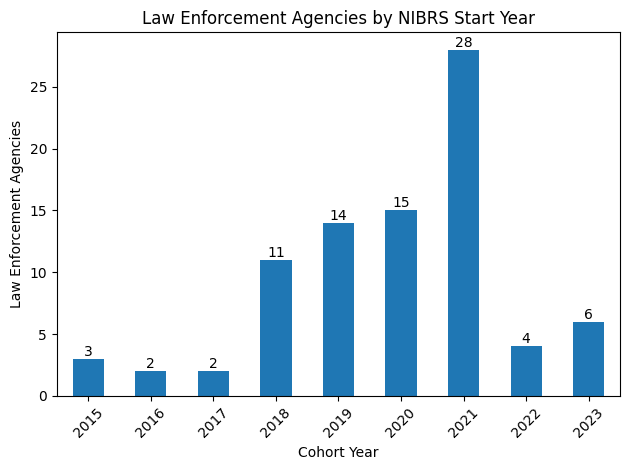

In [211]:
ax = border_report.groupby('cohort_year')['agency_name'].nunique().plot(kind='bar')

plt.xlabel('Cohort Year')
plt.ylabel('Law Enforcement Agencies')
plt.title('Law Enforcement Agencies by NIBRS Start Year')

# Angle the x-axis labels
plt.xticks(rotation=45)

# Add values to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()

#Save plot as a .png file
plt.savefig('graphs//count_of_law_enforcement_agencies_by_cohort_year.png')  

plt.show()

In [212]:
#Group by cohort_year and cohort and count the number of unique agencies
agencies_per_cohort = border_report.groupby(['cohort_year', 'cohort', 'adoption_status', 'adoption_status_numeric'])['agency_name'].nunique()

#Convert the series to a dataframe
agencies_per_cohort = agencies_per_cohort.to_frame()
agencies_per_cohort = agencies_per_cohort.reset_index()

#Rename 'agency_name' to 'count_of_agencies'
agencies_per_cohort = agencies_per_cohort.rename(columns={'agency_name': 'count_of_agencies'})

#Calculate the total number of agencies
total_agencies = agencies_per_cohort['count_of_agencies'].sum()
print("There are", total_agencies, "law enforcement agencies in the dataset.")

# Calculate the percentage for each cohort
agencies_per_cohort['percent'] = ((agencies_per_cohort['count_of_agencies'] / total_agencies) * 100).round(2)

# Rename the 'percent' column to 'percent_of_agencies'
agencies_per_cohort = agencies_per_cohort.rename(columns={'percent': 'percent_of_agencies'})

agencies_per_cohort.head()

There are 85 law enforcement agencies in the dataset.


,cohort_year,cohort,adoption_status,adoption_status_numeric,count_of_agencies,percent_of_agencies
0,2015,2015Q1,early,1,1,1.18
1,2015,2015Q3,early,1,2,2.35
2,2016,2016Q4,early,1,2,2.35
3,2017,2017Q2,early,1,1,1.18
4,2017,2017Q4,early,1,1,1.18


In [213]:
#Aggregate the data by adoption status and adoption_status_numeric, and count the number of unique agencies and calculate the percentage
adoption_percentages = agencies_per_cohort.groupby(['adoption_status', 'adoption_status_numeric'])['count_of_agencies'].sum()

adoption_percentages = adoption_percentages.to_frame()
adoption_percentages = adoption_percentages.reset_index()

#Add a column to calculate the percentage of agencies
adoption_percentages['percentage_of_agencies'] = round((adoption_percentages['count_of_agencies'] / total_agencies) * 100, 2)

#Sort the dataframe by the 'adoption_status_numeric' column
adoption_percentages = adoption_percentages.sort_values('adoption_status_numeric', ascending=True)

#Drop the 'cohort_year' and 'cohort' columns
print("There are ", total_agencies,"agencies in this dataset")
print(adoption_percentages.to_markdown(index=False))


There are  85 agencies in this dataset
| adoption_status   |   adoption_status_numeric |   count_of_agencies |   percentage_of_agencies |
|:------------------|--------------------------:|--------------------:|-------------------------:|
| early             |                         1 |                  47 |                    55.29 |
| on time           |                         2 |                  28 |                    32.94 |
| late              |                         3 |                  10 |                    11.76 |


In [214]:
# Group by 'cohort', then calculate the mean 'nibrs_contribution_percentage'
avg_contribution_per_cohort = border_report.groupby(['cohort_year', 'cohort'])['nibrs_contribution_percentage'].mean().round(2).reset_index()

# Rename the aggregated column and round the values for clarity
avg_contribution_per_cohort['avg_nibrs_contribution_percentage'] = avg_contribution_per_cohort['nibrs_contribution_percentage']
avg_contribution_per_cohort = avg_contribution_per_cohort.drop(columns=['nibrs_contribution_percentage'])

# Display the new DataFrame
avg_contribution_per_cohort.head()

,cohort_year,cohort,avg_nibrs_contribution_percentage
0,2015,2015Q1,90.48
1,2015,2015Q3,39.88
2,2016,2016Q4,100.00
3,2017,2017Q2,100.00
4,2017,2017Q4,98.81


In [215]:
#Merge avg_contribution_per_cohort and agencies_per_cohor on 'cohort' and 'cohort_year'
cohort_avg_contributions = pd.merge(avg_contribution_per_cohort, agencies_per_cohort, on=['cohort', 'cohort_year'])

# Calculate the total number of agencies
total_agencies = cohort_avg_contributions['count_of_agencies'].sum()
print("There are", total_agencies, "law enforcement agencies in the dataset.")
cohort_avg_contributions.head()

#Calculate the average contribution percentage for the entire dataset
avg_contribution = border_report['nibrs_contribution_percentage'].mean().round(2)
print("The average contribution percentage for the entire dataset is", avg_contribution,"%")

#Calculate the median contribution percentage for the entire dataset
median_contribution = border_report['nibrs_contribution_percentage'].median().round(2)
print("The median contribution percentage for the entire dataset is", median_contribution,"%")

#Calculate the standard deviation of the contribution percentage for the entire dataset
std_deviation = border_report['nibrs_contribution_percentage'].std().round(2)
print("The standard deviation of the contribution percentage for the entire dataset is", std_deviation, "%")

cohort_avg_contributions.head()

There are 85 law enforcement agencies in the dataset.
The average contribution percentage for the entire dataset is 81.95 %
The median contribution percentage for the entire dataset is 100.0 %
The standard deviation of the contribution percentage for the entire dataset is 31.04 %


,cohort_year,cohort,avg_nibrs_contribution_percentage,adoption_status,adoption_status_numeric,count_of_agencies,percent_of_agencies
0,2015,2015Q1,90.48,early,1,1,1.18
1,2015,2015Q3,39.88,early,1,2,2.35
2,2016,2016Q4,100.00,early,1,2,2.35
3,2017,2017Q2,100.00,early,1,1,1.18
4,2017,2017Q4,98.81,early,1,1,1.18


In [216]:
# Group by 'adoption_status' and 'adoption_status_numeric' and calculate the mean 'avg_nibrs_contribution_percentage'
adoption_status_percentages = cohort_avg_contributions.groupby(['adoption_status', 'adoption_status_numeric'])['avg_nibrs_contribution_percentage'].mean()

#Create a dataframe from the series
adoption_status_percentages = adoption_status_percentages.to_frame().reset_index()

#Round the 'avg_nibrs_contribution_percentage' column to two decimal places
adoption_status_percentages['avg_nibrs_contribution_percentage'] = adoption_status_percentages['avg_nibrs_contribution_percentage'].round(2)

adoption_status_percentages = adoption_status_percentages.sort_values('adoption_status_numeric', ascending=True)

print(adoption_status_percentages.to_markdown(index=False))

| adoption_status   |   adoption_status_numeric |   avg_nibrs_contribution_percentage |
|:------------------|--------------------------:|------------------------------------:|
| early             |                         1 |                               83.72 |
| on time           |                         2 |                               90.24 |
| late              |                         3 |                               43.16 |


In [217]:
#Merge adoption_percentages with adoption_status_percentages on 'adoption_status'
adoption_status = pd.merge(adoption_percentages, adoption_status_percentages, on=['adoption_status','adoption_status_numeric'])
adoption_status = adoption_status.sort_values('adoption_status_numeric', ascending=True)
adoption_status = adoption_status.drop(columns='adoption_status_numeric')
print(adoption_status.to_markdown(index=False))

| adoption_status   |   count_of_agencies |   percentage_of_agencies |   avg_nibrs_contribution_percentage |
|:------------------|--------------------:|-------------------------:|------------------------------------:|
| early             |                  47 |                    55.29 |                               83.72 |
| on time           |                  28 |                    32.94 |                               90.24 |
| late              |                  10 |                    11.76 |                               43.16 |


In [218]:
# Define a function to categorize each cohort based on the defined thresholds
def categorize_contribution(avg_percentage):
    if avg_percentage > 75:
        return 'Contributes more than 75%'
    elif avg_percentage > 25:
        return 'Contributes between 25 and 75%'
    else:
        return 'Contributes less than 25%'

In [219]:
# Define a function to categorize the number of agencies in each cohort
def categorize_agencies(percent_of_agencies):
    if percent_of_agencies > 15:
        return 'Great than 15'
    elif percent_of_agencies > 5:
        return 'Between 5 and 15'
    else:
        return 'Less than 5'

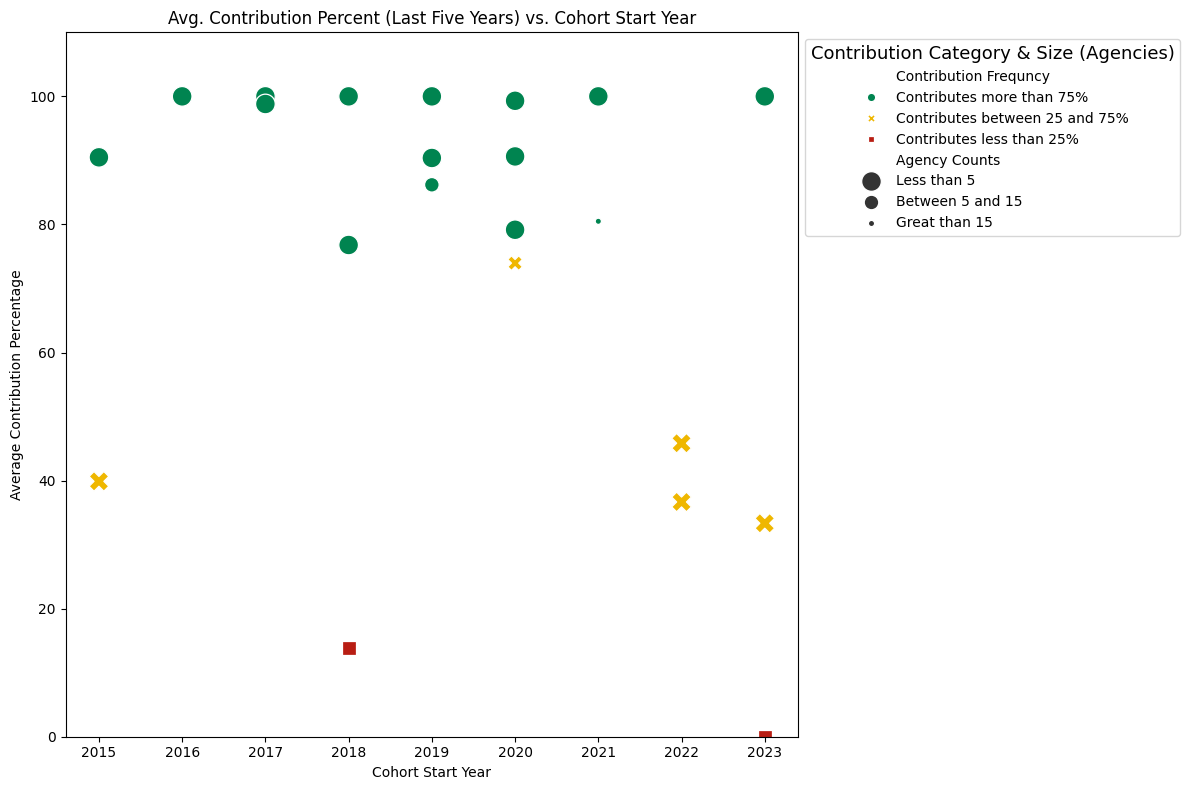

In [220]:
# Apply the contribution catorization
cohort_avg_contributions['Contribution Frequncy'] = cohort_avg_contributions['avg_nibrs_contribution_percentage'].apply(categorize_contribution)

#Apply the agency count categorization
cohort_avg_contributions['Agency Counts'] = cohort_avg_contributions['count_of_agencies'].apply(categorize_agencies)

# Extract the start year from the cohort labels
cohort_avg_contributions['start_year'] = cohort_avg_contributions['cohort'].apply(lambda x: int(x[:4]))

# Specify colors for each contribution category
palette = {'Contributes more than 75%': '#008450',  # Green
           'Contributes between 25 and 75%': '#EFB700',  # Yellow
           'Contributes less than 25%': '#B81D13'}  # Red

# Visualize the relationship between start year and average contribution percentage with adjusted point sizes and colors
plt.figure(figsize=(12, 8))
sns.scatterplot(
        data=cohort_avg_contributions, 
        x='start_year', 
        y='avg_nibrs_contribution_percentage', 
        hue='Contribution Frequncy', 
        style='Contribution Frequncy', 
        size='Agency Counts', 
        sizes=(20, 200), 
        palette=palette, 
        legend='full'
    )

plt.title('Avg. Contribution Percent (Last Five Years) vs. Cohort Start Year')
plt.xlabel('Cohort Start Year')
plt.ylabel('Average Contribution Percentage')
plt.legend(
        title='Contribution Category & Size (Agencies)',
        title_fontsize='13', 
        bbox_to_anchor=(1, 1), 
        loc='upper left', 
        prop={'size': 10}
    )

# Set the y-axis limit to cap at 100
plt.ylim(0, 110)

plt.tight_layout()

# Save plot as a .png file
plt.savefig('graphs//avg_contribution_percent_l5_v_cohort_start_year.png')  
plt.show()

In [221]:
# cohort_avg_contributions.to_csv('data\\4_fact\\cohort_contributions_with_agencies.csv', index=False)